# First Full (Guided by Simplilearn) Practice: Multiple Linear Regression

## Performing Profit Estimation for a Company based on Attributes like R&D Expenditure, Administration, Marketing Expenditure, American State of Location, and Profit 

In [1]:
# Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', 20)

In [3]:
# Importing the Dataset
comp = pd.read_csv(r"C:\Users\ali.rizvi\Downloads\1000_Companies.csv")

# Identifying, both, the Independent & the Dependent Variables

## Extracting Data for our Independent Variable
X = comp.iloc[:, :-1].values ### The first ":" is for Rows; in this case, it states it to take Every Row in - the second ":" is for Columns; in this case, it states it to take Every Column BESIDES the Last one, in & Set the Values in there

## Extracting Data for our Dependent Variable
y = comp.iloc[:, 4].values ### Setting "y" Equal to our Last Row

comp.head(15)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
comp.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [5]:
comp.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

<Axes: >

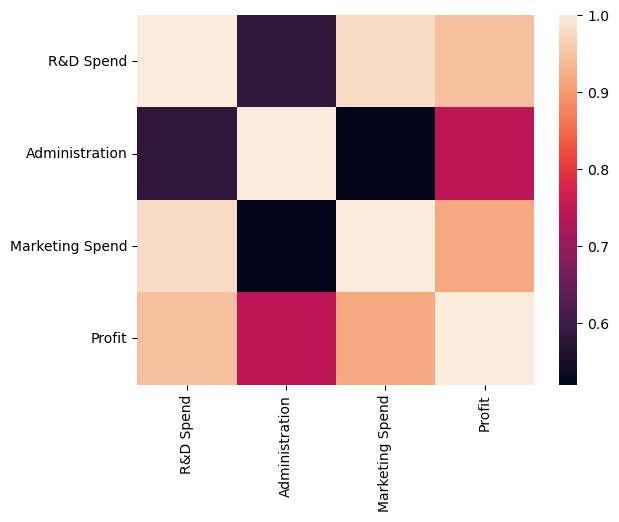

In [6]:
# Making a Correlation Heatmap to Visualize Correlations Between Different Measures
sns.heatmap(comp[['R&D Spend', 'Administration', 'Marketing Spend',  'Profit']].corr())

In [7]:
# Encoding Categorical Data with Numeric Values
# The Regression Model Needs Numeric Values to Calculate Results

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
labelencoder = LabelEncoder() ## To Use the LabelEncoder, Creating a Variable "labelencoder" so that we can Create a Class that we can Reuse to Transfer the Labels back and forth

X[:, 3] = labelencoder.fit_transform(X[:, 3]) ## The ":," part in "X[:, 3]" means that we are taking all Rows, but that we are ONLY editing the 4th ("3]") Column (3rd in the Index)
## After Specifying the Amount of Rows and Columns, and/or Which Column to Take and TRANSFORM^, we fit the Label Encoder to Transform that Column's Values to Numeric Values
##^ In this case, the 3rd column, "State", will have its values transformed into Numeric values - e.g., "New York" will become "1", "California" will become "2", etc.

## This upcoming, Final Transformation Prepares Our Data so that it is Set & Ready as Just a Row of Numbers
# Assuming X is your feature matrix and column index 3 contains the categorical feature
column_transformer = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), [3])],  ## Specifying the Transformer and the Column Index(es); in this case; "3" for 'State'],
    remainder='passthrough')  ## Keep the remaining columns unchanged)
X = column_transformer.fit_transform(X)

print(X) # Now, all Columns have only Numeric Values

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 ...
 [1.0 0.0 0.0 100275.47 241926.31 227142.82]
 [1.0 0.0 0.0 128456.23 321652.14 281692.32]
 [0.0 0.0 1.0 161181.72 270939.86 295442.17]]


In [8]:
# The Encoder^ Actually Created 2 columns: It kept the Original Categorical Column and Created a New One for it with Numeric Values
# We Need to Get Rid of the Categorical One to "Avoid the 'Dummy Variable Trap'"

X = X[:, 1:] ## This Removes the One Extra Column we Created When we Implemented Our OneHotEncoder & our LabelEncoder

### Finally, Creating my Linear Regression Model

In [9]:
# Firstly, Split the Dataset into the "Training Set" & the "Test Set"
from sklearn.model_selection import train_test_split

## Whenever we Create a Predictive Data Model, we should Split it up into a Training Set & a Testing Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

##^ "test_size = 0.2" means 20% of the Rows will be Held & Tested
## "y" is the "Profit" or the Answer we Want

In [10]:
# Fitting a Multiple Linear Regression Model to the Training Set
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Now that the Regressor Model has been Created, Let's Use it on the Test Dataset

In [11]:
y_predict = regressor.predict(X_test)
y_predict ## For the 20% of Variables set Aside for Model Testing Earlier^ ("test_size = 0.2"), It will Produce Answers or "Predicted Results"
## These are the Predicted Profits for those 20% of Test independent variables
print(y_predict)

# Just for Aesthetics, I could also Convert the Object into a Pandas DataFrame & Look at the Values there
## df = pd.DataFrame(y_predict)
## df

[ 89790.61532915  88427.07187361  94894.67836972 175680.8672561
  83411.73042089 110571.90200074 132145.2293644   91473.37719686
 164597.05380606  53222.82667401  66950.19050989 150566.43987005
 126915.20858596  59337.8597105  177513.91053061  75316.28143051
 118248.14406603 164574.40699902 170937.2898107  182069.11645084
 118845.03252689  85669.95112229 180992.59396143  84145.08220145
 105005.83769214 101233.56772746  53831.07669091  56881.41475224
  68896.39346905 210040.00765883 120778.72270894 111724.87157654
 101487.90541518 137959.02649624  63969.95996743 108857.91214126
 186014.72531988 171442.64130747 174644.26529205 117671.49128195
  96731.37857433 165452.25779409 107724.34331255  50194.54176913
 116513.89532179  58632.48986821 158416.4682761   78541.4852161
 159727.66671743 131137.87699644 184880.70924516 174609.0826688
  93745.66352059  78341.13383418 180745.9043908   84461.61490552
 142900.90602903 170618.44098397  84365.09530839 105307.3716218
 141660.07290786  52527.34340

In [12]:
# Checking the Coefficient of the Predicted Regression Model, as well as the Y-Intercept

## The Coefficients of Each of the Model's Test (Independent) variables
print(regressor.coef_) ## The printed values are each Coefficients for All Columns in the Dataset, one by one for all Independent Variables

## The Y-Intercept of the Model
print(regressor.intercept_)

[-8.80536598e+02 -6.98169073e+02  5.25845857e-01  8.44390881e-01
  1.07574255e-01]
-51035.2297240303


In [13]:
# Also Getting the Very Helpful R-Squared Value!
from sklearn.metrics import r2_score
rsquared_score = r2_score(y_test, y_predict) ## "y_test": the Actual Values I am Testing (the ones given to me & that I know are True), "y_predict": the Predicted Values we made in our Predictive Model, Earlier

## The R-Squared Score turned out to be "0.911": 91.1% - Shows that mine is a very Valid Prediction; My Model is a Good Model
##^ My predictions for the Company's Profits are going to be Correct about 91.1% of the Time

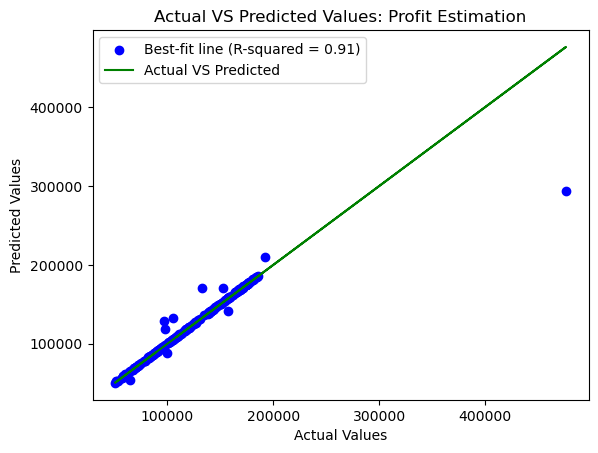

In [15]:
# Plotting the Actual VS Predicted values
plt.scatter(y_test, y_predict, color='blue', label='Actual VS Predicted Values: Profit Estimation')

# Plotting the Best-fit line
plt.plot(y_test, y_test, color='green', label='Best-fit Line')

# Adding labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual VS Predicted Values: Profit Estimation')

# Adding a legend
plt.legend(['Best-fit line (R-squared = {:.2f})'.format(rsquared_score), 'Actual VS Predicted']) ## The '{:.2f}'.format(r_squared) expression formats the R-squared score as a string with two decimal places ({:.2f}), converting the Numerical value of r_squared into a string before including it in the Legend label

# Showing The Final Scatterplot with the Best-fit Line
plt.show()